In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
capita_file_path = "/content/drive/MyDrive/per-capita-energy-use/per-capita-energy-use.csv"
population_file_path = '/content/drive/MyDrive/population_totals.csv'
types_file_path = '/content/drive/MyDrive/global-energy-substitution.csv'

Mounted at /content/drive


# **Preprocessing the Data**




In [ ]:
capita_data = pd.read_csv(capita_file_path)
population_data = pd.read_csv(population_file_path, skiprows=4)
types_data = pd.read_csv(types_file_path)

In [ ]:
print(population_data.head())
print(population_data.isnull().sum())

print(types_data.head())
print(types_data.isnull().sum())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

In [ ]:
population_data.columns = population_data.columns.str.strip()
print(population_data.columns.tolist())

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [ ]:
population_long = population_data.melt(
    id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'],
    var_name='Year',
    value_name='Population'
)

population_long = population_long[population_long['Year'].str.isnumeric()]
population_long['Year'] = population_long['Year'].astype(int)

print(population_long.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

   Year   Population  
0  1960      54922.0  
1  1960  130075728.0  
2  1960    9035043.0  
3  1960   97630925.0  
4  1960    5231654.0  


In [ ]:
merged = pd.merge(
    capita_data,
    population_long,
    left_on=['Entity','Year'],
    right_on=['Country Name','Year'],
    how='inner'
)

merged['Total_Energy_Demand'] = merged['Population'] * merged['Primary energy consumption per capita (kWh/person)']
print(merged.head())


        Entity Code  Year  Primary energy consumption per capita (kWh/person)  \
0  Afghanistan  AFG  1980                                          481.20862    
1  Afghanistan  AFG  1981                                          610.63900    
2  Afghanistan  AFG  1982                                          717.76640    
3  Afghanistan  AFG  1983                                          905.12665    
4  Afghanistan  AFG  1984                                          887.37100    

  Country Name Country Code     Indicator Name Indicator Code  Population  \
0  Afghanistan          AFG  Population, total    SP.POP.TOTL  13169311.0   
1  Afghanistan          AFG  Population, total    SP.POP.TOTL  11937581.0   
2  Afghanistan          AFG  Population, total    SP.POP.TOTL  10991378.0   
3  Afghanistan          AFG  Population, total    SP.POP.TOTL  10917982.0   
4  Afghanistan          AFG  Population, total    SP.POP.TOTL  11190221.0   

   Total_Energy_Demand  
0         6.337186e+09  


# **Visualizations**

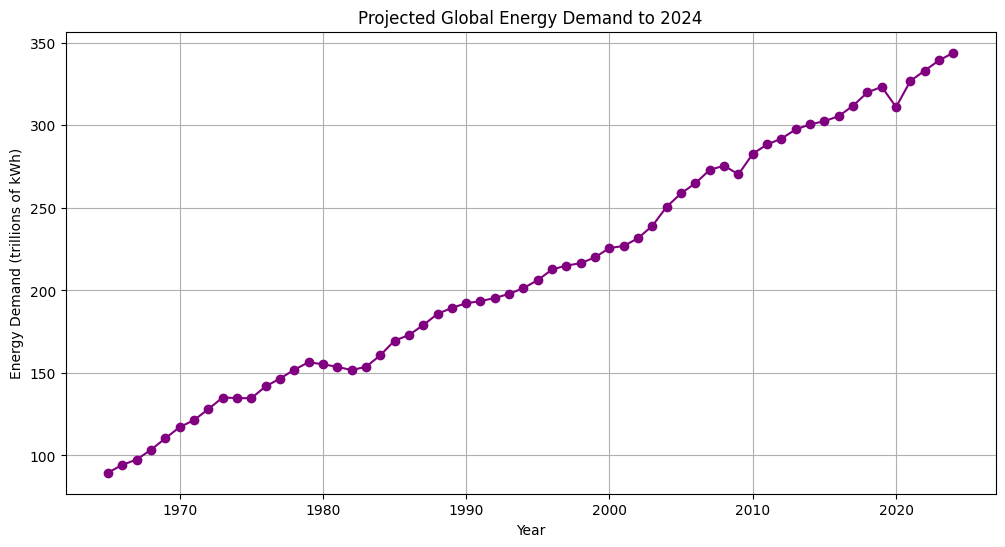

In [ ]:
global_proj = merged.groupby('Year')['Total_Energy_Demand'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_proj['Year'], global_proj['Total_Energy_Demand']/1e12, marker='o', color='purple')
plt.title("Projected Global Energy Demand to 2024")
plt.xlabel("Year")
plt.ylabel("Energy Demand (trillions of kWh)")
plt.grid(True)
plt.show()


/tmp/ipython-input-3733082518.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Primary energy consumption per capita (kWh/person)', y='Entity', data=top10, palette="Blues_r")


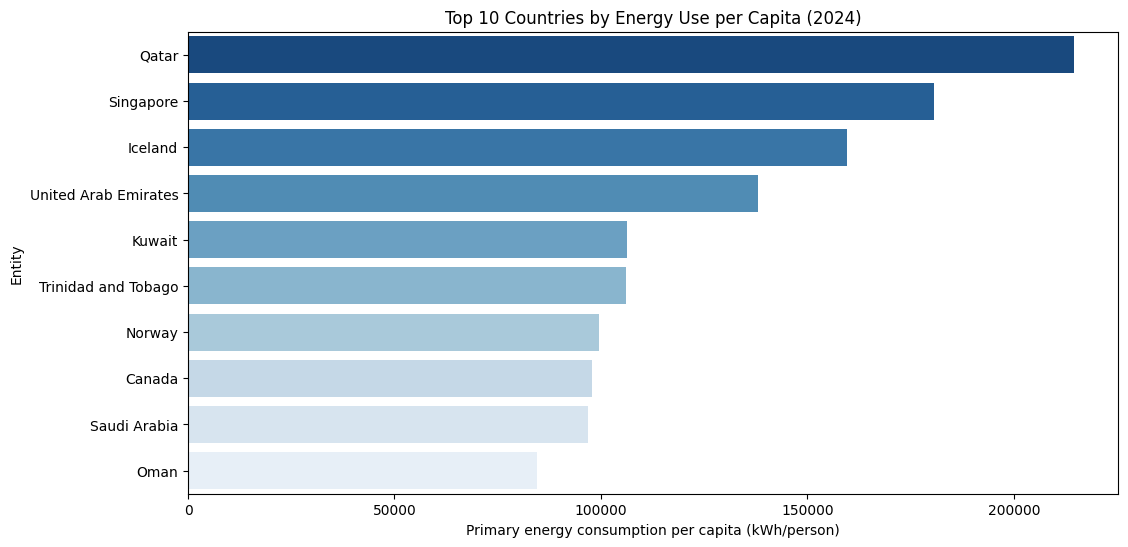

/tmp/ipython-input-3733082518.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Primary energy consumption per capita (kWh/person)', y='Entity', data=bottom10, palette="Oranges_r")


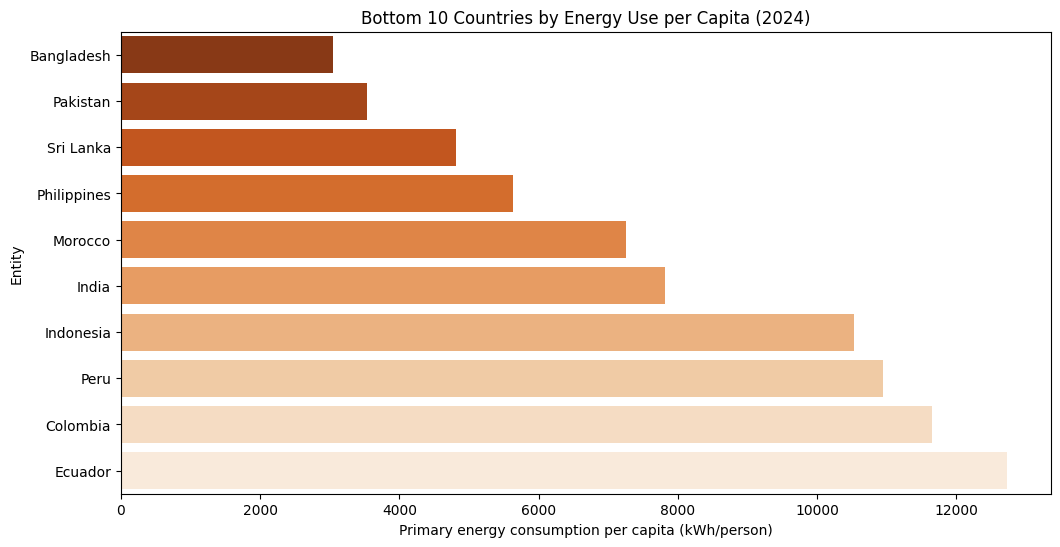

In [ ]:
data_2024 = merged[merged['Year'] == 2024]

top10 = data_2024.nlargest(10, 'Primary energy consumption per capita (kWh/person)')
bottom10 = data_2024.nsmallest(10, 'Primary energy consumption per capita (kWh/person)')

plt.figure(figsize=(12,6))
sns.barplot(x='Primary energy consumption per capita (kWh/person)', y='Entity', data=top10, palette="Blues_r")
plt.title("Top 10 Countries by Energy Use per Capita (2024)")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='Primary energy consumption per capita (kWh/person)', y='Entity', data=bottom10, palette="Oranges_r")
plt.title("Bottom 10 Countries by Energy Use per Capita (2024)")
plt.show()


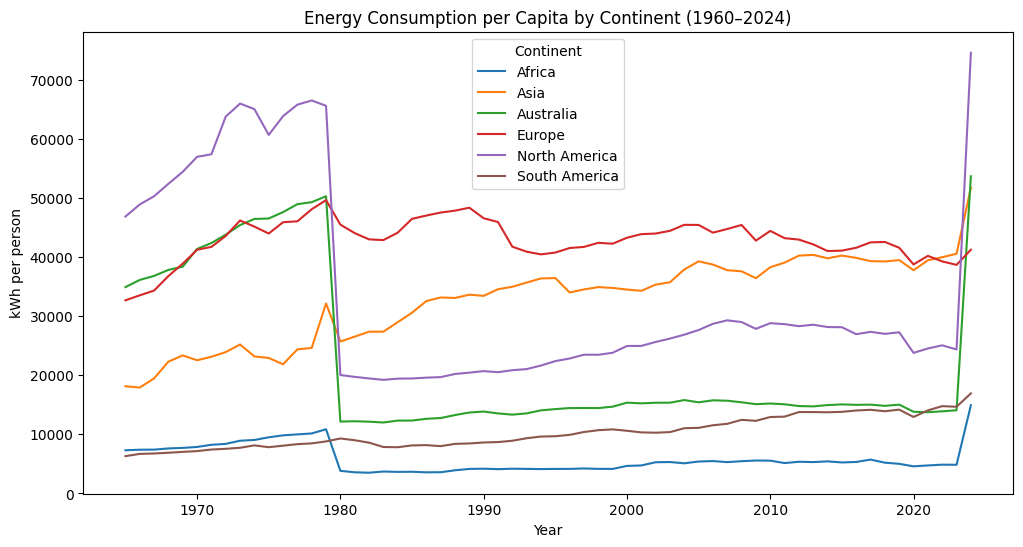

In [ ]:
continent_map = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Australia',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Cape Verde': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Fiji': 'Australia',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Australia',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Australia',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Korea': 'Asia',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Australia',
    'Panama': 'North America',
    'Papua New Guinea': 'Australia',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Australia',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Australia',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Australia',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Australia',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Australia',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

merged['Continent'] = merged['Entity'].map(continent_map)

continent_growth = merged.groupby(['Continent','Year'])['Primary energy consumption per capita (kWh/person)'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Primary energy consumption per capita (kWh/person)', hue='Continent', data=continent_growth)
plt.title("Energy Consumption per Capita by Continent (1960–2024)")
plt.ylabel("kWh per person")
plt.show()

/tmp/ipython-input-1257029326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


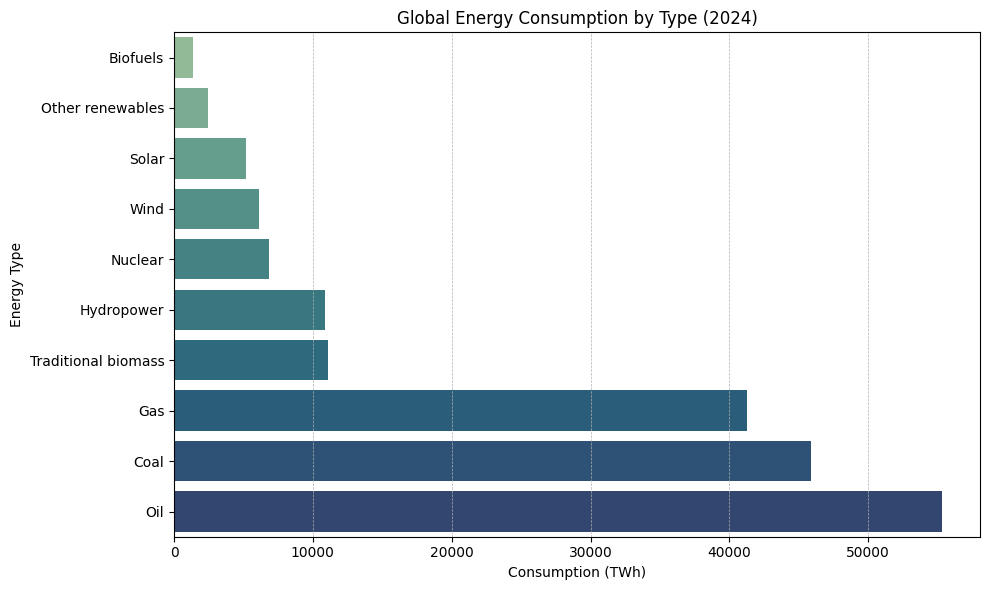

In [ ]:
types_file_path = types_data[types_data['Year'] == 2024].copy()
types_file_path.columns = types_file_path.columns.str.replace(" \\(TWh, substituted energy\\)", "", regex=True)

energy_cols = ['Coal','Oil','Gas','Nuclear','Hydropower','Wind','Solar','Biofuels','Other renewables','Traditional biomass']
global_energy_2024 = types_file_path[energy_cols].sum().reset_index()
global_energy_2024.columns = ['Type of energy','Consumption (TWh)']

plt.figure(figsize=(10,6))
sns.barplot(
    x='Consumption (TWh)',
    y='Type of energy',
    data=global_energy_2024.sort_values('Consumption (TWh)', ascending=True),
    palette='crest'
)

plt.title("Global Energy Consumption by Type (2024)")
plt.xlabel("Consumption (TWh)")
plt.ylabel("Energy Type")
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

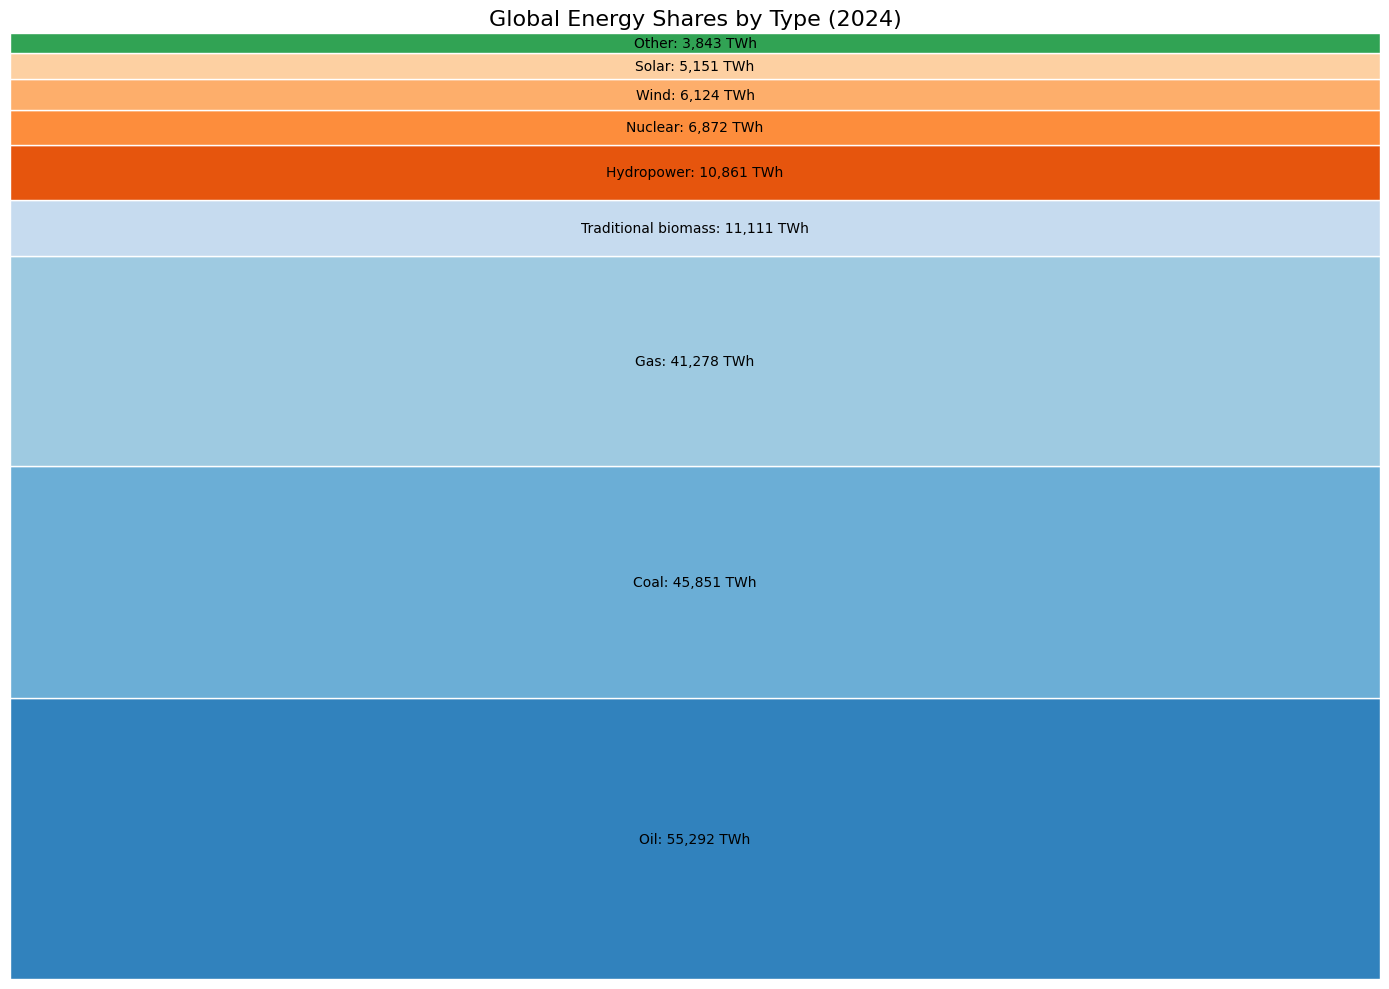

In [ ]:
types_file_path_sorted = types_file_path[energy_cols].sum().sort_values(ascending=False).reset_index()
types_file_path_sorted.columns = ['Type of energy', 'Consumption (TWh)']

top_n = 8
top_types = types_file_path_sorted.iloc[:top_n].copy()
other_total = types_file_path_sorted.iloc[top_n:]['Consumption (TWh)'].sum()
top_types.loc[len(top_types)] = ['Other', other_total]

sizes = top_types['Consumption (TWh)']
sizes_normalized = sizes / sizes.sum()

fig, ax = plt.subplots(figsize=(14,10))
x, y, width, height = 0, 0, 1, 1
colors = plt.cm.tab20c(range(len(sizes)))

for i, (label, size) in enumerate(zip(top_types['Type of energy'], sizes_normalized)):
    rect_height = size * height
    rect = Rectangle((x, y), width, rect_height, facecolor=colors[i], edgecolor="white")
    ax.add_patch(rect)
    ax.text(x + width/2, y + rect_height/2,
            f"{label}: {top_types['Consumption (TWh)'].iloc[i]:,.0f} TWh",
            ha="center", va="center", fontsize=10, color="black")
    y += rect_height

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.axis("off")
plt.title("Global Energy Shares by Type (2024)", fontsize=16)
plt.tight_layout()
plt.show()

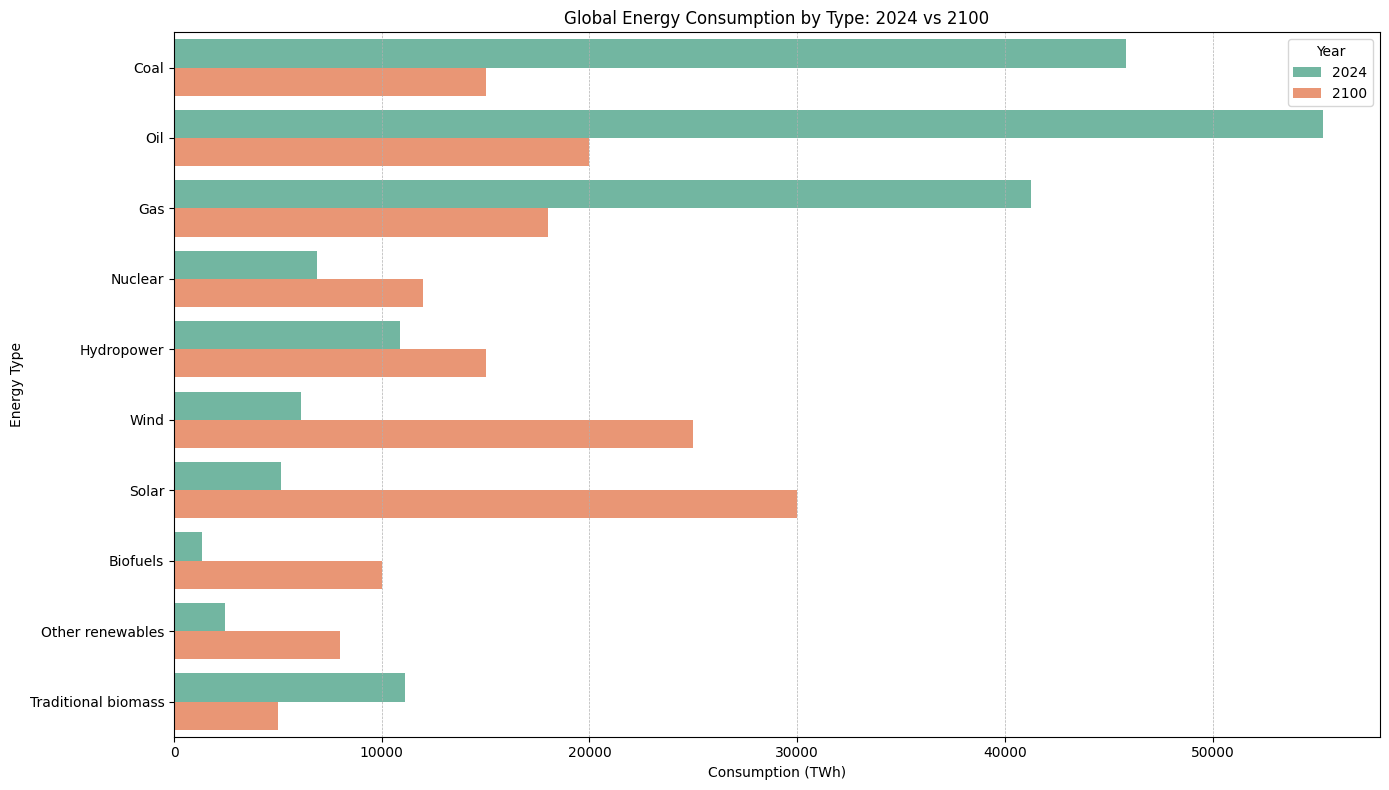

In [ ]:
energy_cols = ['Coal','Oil','Gas','Nuclear','Hydropower','Wind','Solar','Biofuels','Other renewables','Traditional biomass']
actual_2024 = types_file_path[types_file_path['Year'] == 2024][energy_cols].sum()

projected_2100 = pd.Series({
    'Coal': 15000,
    'Oil': 20000,
    'Gas': 18000,
    'Nuclear': 12000,
    'Hydropower': 15000,
    'Wind': 25000,
    'Solar': 30000,
    'Biofuels': 10000,
    'Other renewables': 8000,
    'Traditional biomass': 5000
})
df_compare = pd.DataFrame({
    '2024': actual_2024,
    '2100': projected_2100
}).reset_index().rename(columns={'index':'Type of energy'})


df_melted = df_compare.melt(id_vars='Type of energy', var_name='Year', value_name='Consumption (TWh)')
plt.figure(figsize=(14,8))
sns.barplot(x='Consumption (TWh)', y='Type of energy', hue='Year', data=df_melted, palette='Set2')
plt.title("Global Energy Consumption by Type: 2024 vs 2100")
plt.xlabel("Consumption (TWh)")
plt.ylabel("Energy Type")
plt.legend(title="Year")
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


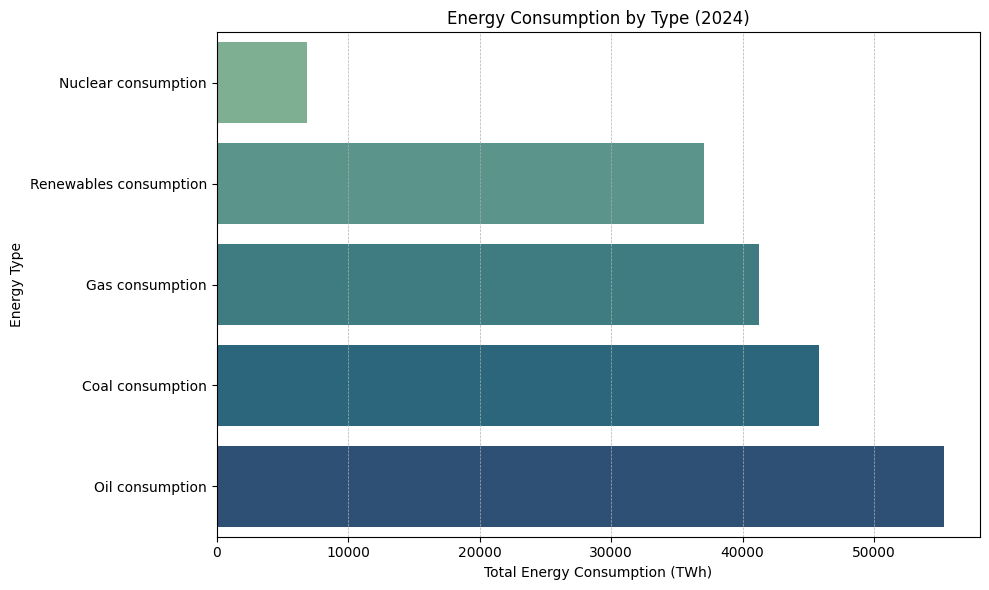

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming types_file_path is already filtered for 2024 and processed

# Define the desired energy categories and their mapping to actual column names
energy_categories = {
    'Coal consumption': 'Coal',
    'Oil consumption': 'Oil',
    'Gas consumption': 'Gas',
    'Nuclear consumption': 'Nuclear',
}

# Columns for renewable energy sources in types_file_path
renewable_cols = [
    'Hydropower',
    'Wind',
    'Solar',
    'Biofuels',
    'Other renewables',
    'Traditional biomass'
]

# Calculate the consumption for each category
consumption_data = {}
for display_name, col_name in energy_categories.items():
    consumption_data[display_name] = types_file_path[col_name].sum()

# Sum all renewable energy sources for 'Renewables consumption'
consumption_data['Renewables consumption'] = types_file_path[renewable_cols].sum().sum()

# Convert to DataFrame
energy_by_type = pd.DataFrame(consumption_data.items(), columns=['Type of energy', 'Energy consumption (TWh)'])

# Sort for better visuals
energy_by_type = energy_by_type.sort_values('Energy consumption (TWh)', ascending=True)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Energy consumption (TWh)',
    y='Type of energy',
    data=energy_by_type,
    palette='crest',
    hue='Type of energy',
    legend=False
)

plt.xlabel("Total Energy Consumption (TWh)") # Changed from kWh to TWh to match types_file_path units
plt.ylabel("Energy Type")
plt.title("Energy Consumption by Type (2024)")
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
population_data = pd.read_csv(population_file_path, skiprows=4)
# transform populations_df from wide to long to match per_capita_energy_df layout
# result: columns -> Entity, Code, Year, <Indicator Name> (e.g. "Population, total")
year_cols = [c for c in population_data.columns if str(c).isdigit()]
# choose a sensible value column name (use indicator if unique)
if population_data['Indicator Name'].nunique() == 1:
    value_col = population_data['Indicator Name'].iloc[0]
else:
    value_col = 'value'

processed_popu_data = population_data.melt(
    id_vars=['Country Name', 'Country Code'],
    value_vars=year_cols,
    var_name='Year',
    value_name=value_col
).rename(columns={'Country Name': 'Entity', 'Country Code': 'Code'})

# clean types and drop missing values
processed_popu_data['Year'] = processed_popu_data['Year'].astype(int)
populations_long_df = processed_popu_data.dropna(subset=[value_col]).reset_index(drop=True)

# sort for convenience
processed_popu_data = populations_long_df.sort_values(['Entity', 'Year']).reset_index(drop=True)

In [ ]:
# populations_long_df now matches the structure of per_capita_energy_df:
# columns -> Entity, Code, Year, <Indicator Name>
processed_popu_data.head()

,Entity,Code,Year,"Population, total"
0,Afghanistan,AFG,1960,9035043.0
1,Afghanistan,AFG,1961,9214083.0
2,Afghanistan,AFG,1962,9404406.0
3,Afghanistan,AFG,1963,9604487.0
4,Afghanistan,AFG,1964,9814318.0


In [ ]:
processed_popu_data.tail()

,Entity,Code,Year,"Population, total"
17190,Zimbabwe,ZWE,2020,15526888.0
17191,Zimbabwe,ZWE,2021,15797210.0
17192,Zimbabwe,ZWE,2022,16069056.0
17193,Zimbabwe,ZWE,2023,16340822.0
17194,Zimbabwe,ZWE,2024,16634373.0


In [ ]:
# combine capita_data and population data
per_country_data = pd.merge(capita_data, processed_popu_data, on=['Entity','Code','Year'])
per_country_data

,Entity,Code,Year,Primary energy consumption per capita (kWh/person),"Population, total"
0,Afghanistan,AFG,1980,481.20862,13169311.0
1,Afghanistan,AFG,1981,610.63900,11937581.0
2,Afghanistan,AFG,1982,717.76640,10991378.0
3,Afghanistan,AFG,1983,905.12665,10917982.0
4,Afghanistan,AFG,1984,887.37100,11190221.0
...,...,...,...,...,...
8326,Zimbabwe,ZWE,2019,2603.88100,15271368.0
8327,Zimbabwe,ZWE,2020,2163.06840,15526888.0
8328,Zimbabwe,ZWE,2021,2382.43430,15797210.0
8329,Zimbabwe,ZWE,2022,3633.06740,16069056.0


# Aggregate Dataframes

In [ ]:
types_world_data = pd.read_csv('/content/drive/MyDrive/global-energy-substitution.csv')
types_world_data

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
0,World,OWID_WRL,1800,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000,97.000,5556
1,World,OWID_WRL,1810,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000,128.000,5833
2,World,OWID_WRL,1820,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000,153.000,6111
3,World,OWID_WRL,1830,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000,264.000,6389
4,World,OWID_WRL,1840,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000,356.000,6944
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,World,OWID_WRL,2020,2152.2898,1068.2296,2116.7441,3940.1646,10763.280,6639.5180,38704.047,49101.246,42316.324,11111
73,World,OWID_WRL,2021,2317.5542,1128.1194,2593.0813,4582.7812,10575.532,6903.3267,40225.734,51846.820,44642.164,11111
74,World,OWID_WRL,2022,2379.4795,1193.1312,3249.7456,5184.6016,10650.595,6583.3306,40059.652,53562.110,44926.926,11111
75,World,OWID_WRL,2023,2411.3584,1319.2163,4026.5818,5665.2080,10392.080,6677.1300,40151.220,54838.684,45319.086,11111


In [ ]:
types_world_data.tail()

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
72,World,OWID_WRL,2020,2152.2898,1068.2296,2116.7441,3940.1646,10763.280,6639.5180,38704.047,49101.246,42316.324,11111
73,World,OWID_WRL,2021,2317.5542,1128.1194,2593.0813,4582.7812,10575.532,6903.3267,40225.734,51846.820,44642.164,11111
74,World,OWID_WRL,2022,2379.4795,1193.1312,3249.7456,5184.6016,10650.595,6583.3306,40059.652,53562.110,44926.926,11111
75,World,OWID_WRL,2023,2411.3584,1319.2163,4026.5818,5665.2080,10392.080,6677.1300,40151.220,54838.684,45319.086,11111
76,World,OWID_WRL,2024,2476.3567,1366.8783,5150.5693,6124.4653,10860.753,6871.8350,41278.270,55292.082,45850.543,11111


In [ ]:


url = "https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv"
df = pd.read_csv(url)

df.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [ ]:
df_countries = df[df['iso_code'].str.len() == 3]
df_countries.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
25,Afghanistan,1900,AFG,4707744.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Afghanistan,1901,AFG,4751177.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Afghanistan,1902,AFG,4802500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Afghanistan,1903,AFG,4861833.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Afghanistan,1904,AFG,4921891.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


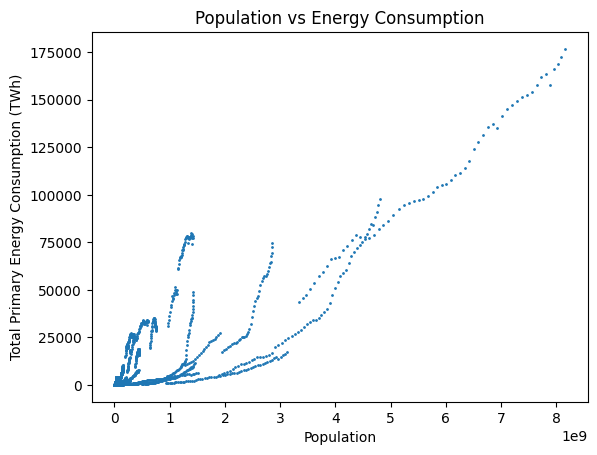

In [ ]:


df_plot = df[df['primary_energy_consumption'].notna()]

plt.scatter(
    df_plot['population'],
    df_plot['primary_energy_consumption'],
    s=1
)

plt.xlabel("Population")
plt.ylabel("Total Primary Energy Consumption (TWh)")
plt.title("Population vs Energy Consumption")
plt.show()


In [ ]:
latest = df[df['year'] == 2022]

top10 = latest.nlargest(10, 'energy_per_capita')
bottom10 = latest.nsmallest(10, 'energy_per_capita')

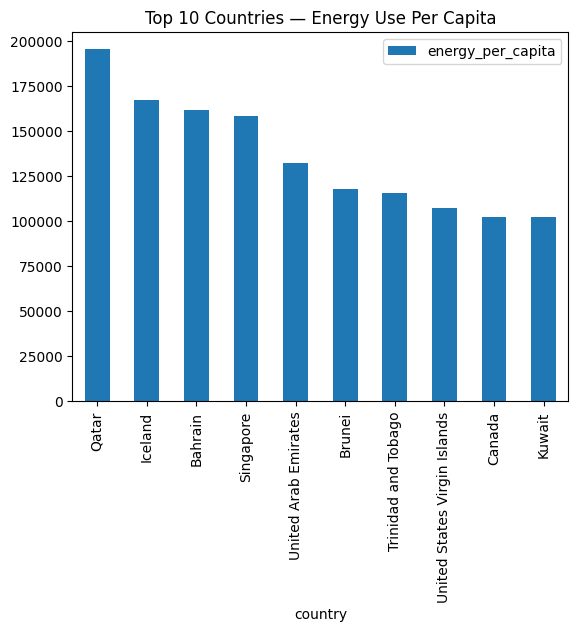

In [ ]:
top10.plot(x='country', y='energy_per_capita', kind='bar')
plt.title("Top 10 Countries — Energy Use Per Capita")
plt.show()

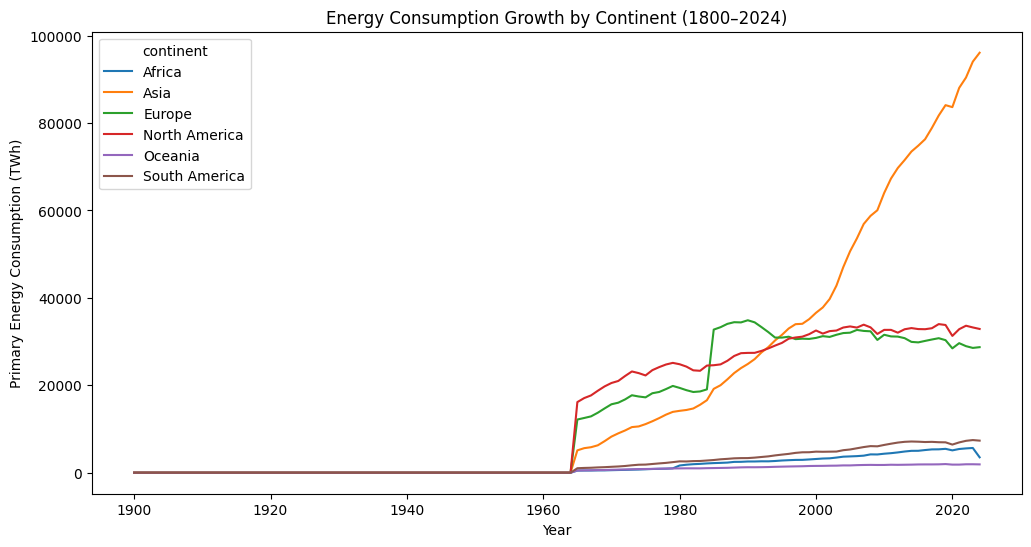

In [ ]:
# Mapping ISO country codes to continents
continent_map = {
    # Africa
    "DZA":"Africa","AGO":"Africa","BEN":"Africa","BWA":"Africa","BFA":"Africa","BDI":"Africa",
    "CMR":"Africa","CPV":"Africa","CAF":"Africa","TCD":"Africa","COM":"Africa","COG":"Africa",
    "CIV":"Africa","DJI":"Africa","EGY":"Africa","GNQ":"Africa","ERI":"Africa","ETH":"Africa",
    "GAB":"Africa","GMB":"Africa","GHA":"Africa","GIN":"Africa","KEN":"Africa","LSO":"Africa",
    "LBR":"Africa","LBY":"Africa","MDG":"Africa","MWI":"Africa","MLI":"Africa","MRT":"Africa",
    "MUS":"Africa","MYT":"Africa","MAR":"Africa","MOZ":"Africa","NAM":"Africa","NER":"Africa",
    "NGA":"Africa","RWA":"Africa","SHN":"Africa","STP":"Africa","SEN":"Africa","SYC":"Africa",
    "SLE":"Africa","SOM":"Africa","ZAF":"Africa","SSD":"Africa","SDN":"Africa","SWZ":"Africa",
    "TZA":"Africa","TGO":"Africa","TUN":"Africa","UGA":"Africa","ZMB":"Africa","ZWE":"Africa",

    # Asia
    "AFG":"Asia","ARM":"Asia","AZE":"Asia","BHR":"Asia","BGD":"Asia","BTN":"Asia","BRN":"Asia",
    "KHM":"Asia","CHN":"Asia","CYP":"Asia","GEO":"Asia","HKG":"Asia","IND":"Asia","IDN":"Asia",
    "IRN":"Asia","IRQ":"Asia","ISR":"Asia","JPN":"Asia","JOR":"Asia","KAZ":"Asia","KWT":"Asia",
    "KGZ":"Asia","LAO":"Asia","LBN":"Asia","MAC":"Asia","MYS":"Asia","MDV":"Asia","MNG":"Asia",
    "MMR":"Asia","NPL":"Asia","OMN":"Asia","PAK":"Asia","PHL":"Asia","QAT":"Asia","SAU":"Asia",
    "SGP":"Asia","KOR":"Asia","LKA":"Asia","SYR":"Asia","TWN":"Asia","TJK":"Asia","THA":"Asia",
    "TUR":"Asia","TKM":"Asia","ARE":"Asia","UZB":"Asia","VNM":"Asia","YEM":"Asia",

    # Europe
    "ALB":"Europe","AND":"Europe","AUT":"Europe","BLR":"Europe","BEL":"Europe","BIH":"Europe",
    "BGR":"Europe","HRV":"Europe","CZE":"Europe","DNK":"Europe","EST":"Europe","FRO":"Europe",
    "FIN":"Europe","FRA":"Europe","DEU":"Europe","GIB":"Europe","GRC":"Europe","GGY":"Europe",
    "HUN":"Europe","ISL":"Europe","IRL":"Europe","IMN":"Europe","ITA":"Europe","JEY":"Europe",
    "LVA":"Europe","LIE":"Europe","LTU":"Europe","LUX":"Europe","MLT":"Europe","MDA":"Europe",
    "MCO":"Europe","MNE":"Europe","NLD":"Europe","MKD":"Europe","NOR":"Europe","POL":"Europe",
    "PRT":"Europe","ROU":"Europe","RUS":"Europe","SMR":"Europe","SRB":"Europe","SVK":"Europe",
    "SVN":"Europe","ESP":"Europe","SWE":"Europe","CHE":"Europe","UKR":"Europe","GBR":"Europe",

    # North America
    "AIA":"North America","ATG":"North America","ABW":"North America","BHS":"North America",
    "BRB":"North America","BLZ":"North America","CAN":"North America","CRI":"North America",
    "CUB":"North America","DMA":"North America","DOM":"North America","SLV":"North America",
    "GRL":"North America","GRD":"North America","GLP":"North America","GTM":"North America",
    "HTI":"North America","HND":"North America","JAM":"North America","MEX":"North America",
    "MSR":"North America","ANT":"North America","PAN":"North America","KNA":"North America",
    "LCA":"North America","VCT":"North America","TTO":"North America","USA":"North America",

    # South America
    "ARG":"South America","BOL":"South America","BRA":"South America","CHL":"South America",
    "COL":"South America","ECU":"South America","GUY":"South America","PRY":"South America",
    "PER":"South America","SUR":"South America","URY":"South America","VEN":"South America",

    # Oceania
    "AUS":"Oceania","FJI":"Oceania","FSM":"Oceania","KIR":"Oceania","MHL":"Oceania",
    "NRU":"Oceania","NZL":"Oceania","PLW":"Oceania","PNG":"Oceania","WSM":"Oceania",
    "SLB":"Oceania","TON":"Oceania","TUV":"Oceania","VUT":"Oceania"
}

df['continent'] = df['iso_code'].map(continent_map)

df_cont = df[df['continent'].notna()]


continent_energy = (
    df_cont.groupby(['continent', 'year'])['primary_energy_consumption']
    .sum()
    .reset_index()
)

pivot = continent_energy.pivot(index='year', columns='continent', values='primary_energy_consumption')

pivot.plot(figsize=(12,6))
plt.title("Energy Consumption Growth by Continent (1800–2024)")
plt.ylabel("Primary Energy Consumption (TWh)")
plt.xlabel("Year")
plt.show()